Image classification model : Ujjwal Raj

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
Y_train = Y_train.reshape(-1,)
Y_test = Y_test.reshape(-1,)

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
def plot_sample(X, Y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])
    plt.show()

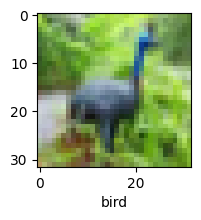

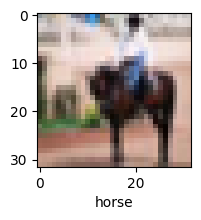

In [6]:
plot_sample(X_train, Y_train, 6)
plot_sample(X_train, Y_train, 11)

In [7]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [8]:
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [9]:
ann.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 143s 91ms/step - loss: 1.8081 - accuracy: 0.3580
Epoch 2/5
1563/1563 [==============================] - 147s 94ms/step - loss: 1.6198 - accuracy: 0.4297
Epoch 3/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.5400 - accuracy: 0.4576
Epoch 4/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.4809 - accuracy: 0.4776
Epoch 5/5
1563/1563 [==============================] - 143s 91ms/step - loss: 1.4307 - accuracy: 0.4973


In [10]:
Y_pred_ann = ann.predict(X_test)
Y_pred_classes_ann = [np.argmax(element) for element in Y_pred_ann]

313/313 [==============================] - 9s 28ms/step


In [11]:
print('Classification report for ANN:\n', classification_report(Y_test, Y_pred_classes_ann))


Classification report for ANN:
               precision    recall  f1-score   support

           0       0.76      0.24      0.36      1000
           1       0.68      0.35      0.46      1000
           2       0.48      0.16      0.24      1000
           3       0.37      0.22      0.28      1000
           4       0.36      0.55      0.44      1000
           5       0.38      0.40      0.39      1000
           6       0.49      0.58      0.53      1000
           7       0.59      0.47      0.52      1000
           8       0.44      0.78      0.56      1000
           9       0.39      0.76      0.51      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.43     10000
weighted avg       0.50      0.45      0.43     10000



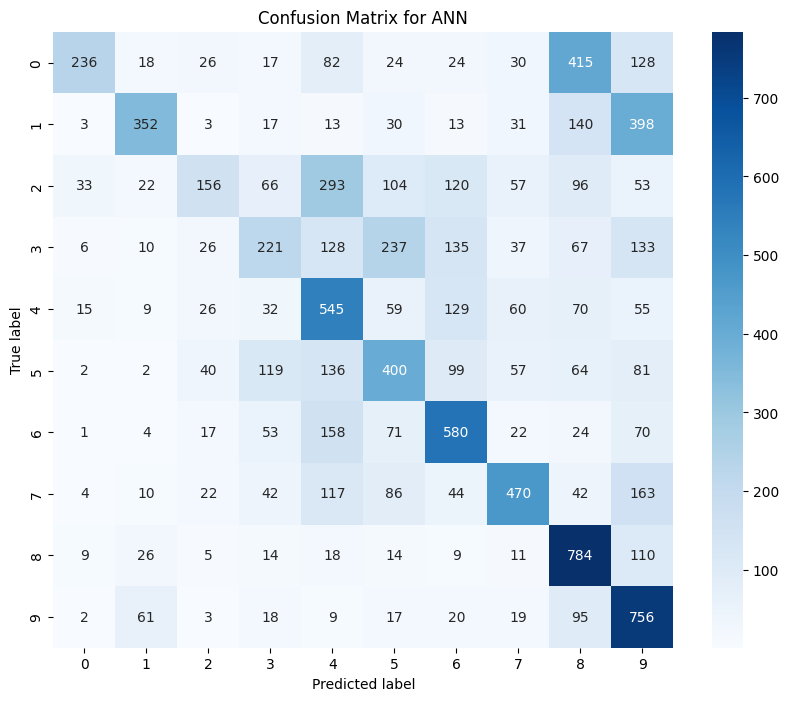

In [12]:
conf_matrix_ann = confusion_matrix(Y_test, Y_pred_classes_ann)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for ANN')
plt.show()

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [15]:
cnn.fit(X_train, Y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 40s 24ms/step - loss: 1.4589 - accuracy: 0.4834
Epoch 2/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.1578 - accuracy: 0.5968
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0386 - accuracy: 0.6372
Epoch 4/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.9569 - accuracy: 0.6676
Epoch 5/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.8894 - accuracy: 0.6898
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8351 - accuracy: 0.7072
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7862 - accuracy: 0.7250
Epoch 8/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.7359 - accuracy: 0.7421
Epoch 9/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.6961 - accuracy: 0.7570
Epoch 10/10
1563/1563 [==============================] - 36s 23m

In [16]:
cnn.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.0745 - accuracy: 0.6495


[1.0744520425796509, 0.6495000123977661]

In [17]:
Y_pred_cnn = cnn.predict(X_test)
Y_pred_classes_cnn = [np.argmax(element) for element in Y_pred_cnn]

313/313 [==============================] - 2s 7ms/step


In [18]:
print('Classification report for CNN:\n', classification_report(Y_test, Y_pred_classes_cnn))


Classification report for CNN:
               precision    recall  f1-score   support

           0       0.72      0.67      0.69      1000
           1       0.76      0.76      0.76      1000
           2       0.48      0.55      0.51      1000
           3       0.49      0.42      0.45      1000
           4       0.62      0.56      0.59      1000
           5       0.57      0.54      0.55      1000
           6       0.66      0.78      0.72      1000
           7       0.70      0.72      0.71      1000
           8       0.74      0.79      0.76      1000
           9       0.75      0.72      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



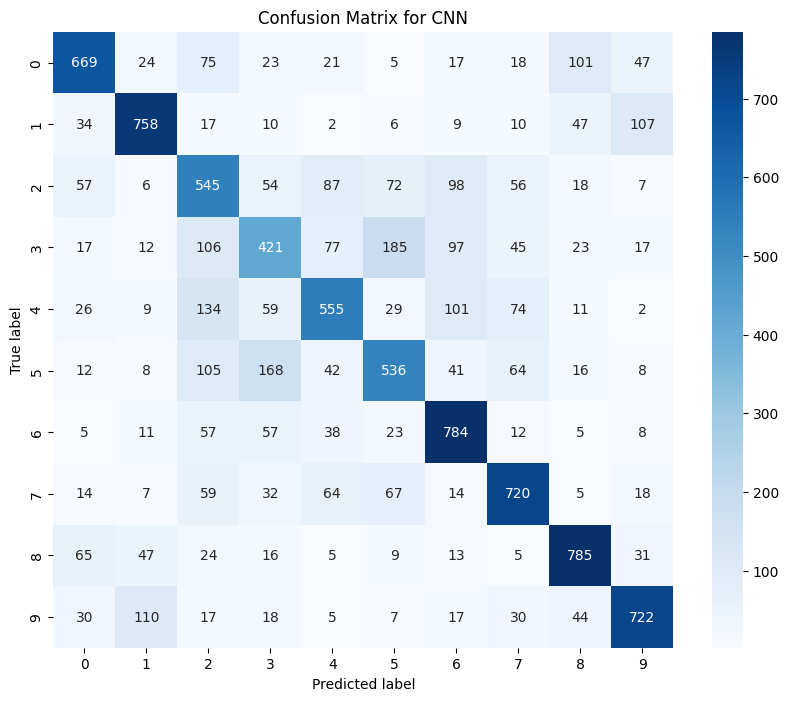

In [19]:
conf_matrix_cnn = confusion_matrix(Y_test, Y_pred_classes_cnn)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for CNN')
plt.show()

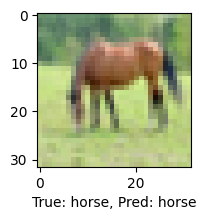

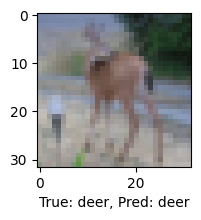

In [21]:
def plot_sample_with_prediction(X, Y_true, Y_pred, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(f"True: {classes[Y_true[index]]}, Pred: {classes[Y_pred[index]]}")
    plt.show()

plot_sample_with_prediction(X_test, Y_test, Y_pred_classes_cnn, 60)
plot_sample_with_prediction(X_test, Y_test, Y_pred_classes_cnn, 100)

In [24]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [22]:
def plot_sample_images(images, labels, class_names, rows=3, cols=5):
    plt.figure(figsize=(15, 8))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

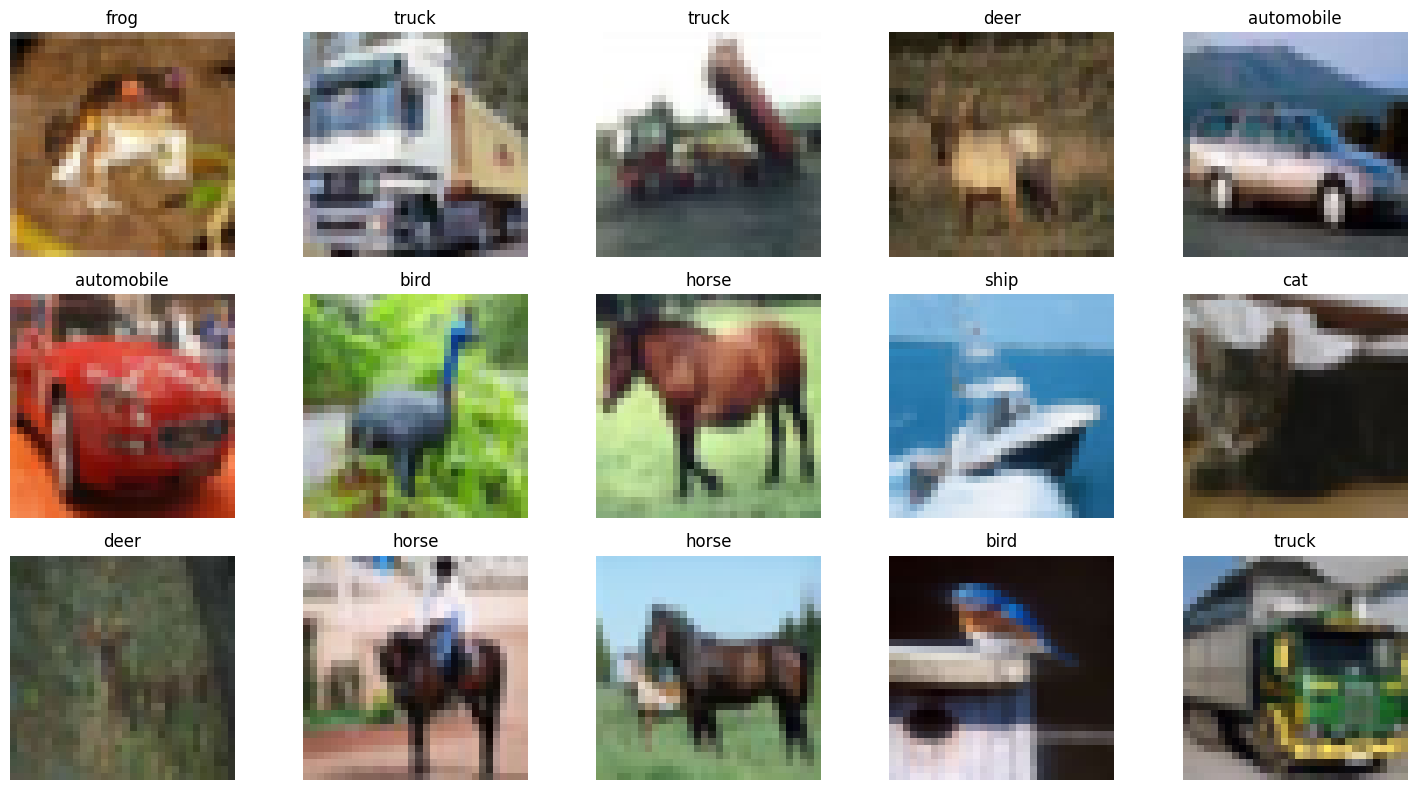

In [25]:
plot_sample_images(X_train, Y_train, class_names)


In [27]:
def build_ann_model(input_shape):
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='SGD',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [28]:
ann_model = build_ann_model(X_train.shape[1:])
ann_history = ann_model.fit(X_train, Y_train, epochs=5, verbose=1)

Epoch 1/5
1563/1563 [==============================] - 143s 91ms/step - loss: 1.8136 - accuracy: 0.3534
Epoch 2/5
1563/1563 [==============================] - 147s 94ms/step - loss: 1.6251 - accuracy: 0.4273
Epoch 3/5
1563/1563 [==============================] - 145s 93ms/step - loss: 1.5432 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 158s 101ms/step - loss: 1.4829 - accuracy: 0.4762
Epoch 5/5
1563/1563 [==============================] - 147s 94ms/step - loss: 1.4336 - accuracy: 0.4953


In [29]:
ann_loss, ann_accuracy = ann_model.evaluate(X_test, Y_test, verbose=0)
print(f'ANN Test Accuracy: {ann_accuracy:.4f}')

ANN Test Accuracy: 0.4602


In [30]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

313/313 [==============================] - 9s 29ms/step


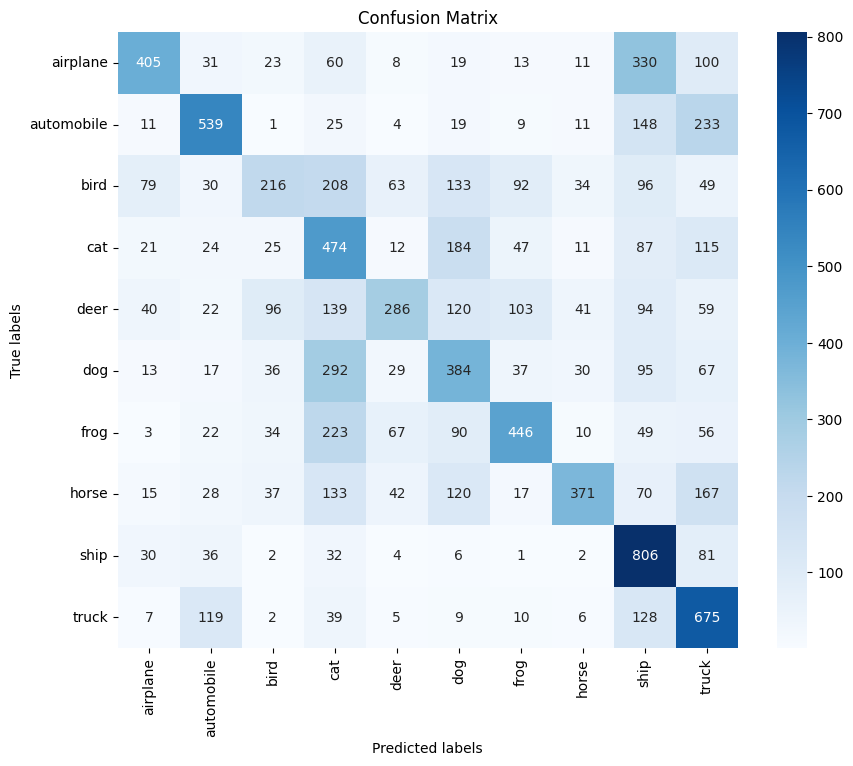

In [31]:
Y_pred_ann = np.argmax(ann_model.predict(X_test), axis=-1)
plot_confusion_matrix(Y_test, Y_pred_ann, class_names)


In [32]:
def build_cnn_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

cnn_model = build_cnn_model(X_train.shape[1:])
cnn_history = cnn_model.fit(X_train, Y_train, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.5601 - accuracy: 0.4398
Epoch 2/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.2726 - accuracy: 0.5529
Epoch 3/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.1666 - accuracy: 0.5928
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0957 - accuracy: 0.6198
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0426 - accuracy: 0.6354
Epoch 6/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.9979 - accuracy: 0.6517
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9613 - accuracy: 0.6646
Epoch 8/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9274 - accuracy: 0.6767
Epoch 9/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.8992 - accuracy: 0.6864
Epoch 10/10
1563/1563 [==============================] - 41s 26m

In [33]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, Y_test, verbose=0)
print(f'CNN Test Accuracy: {cnn_accuracy:.4f}')

CNN Test Accuracy: 0.6350


313/313 [==============================] - 3s 10ms/step


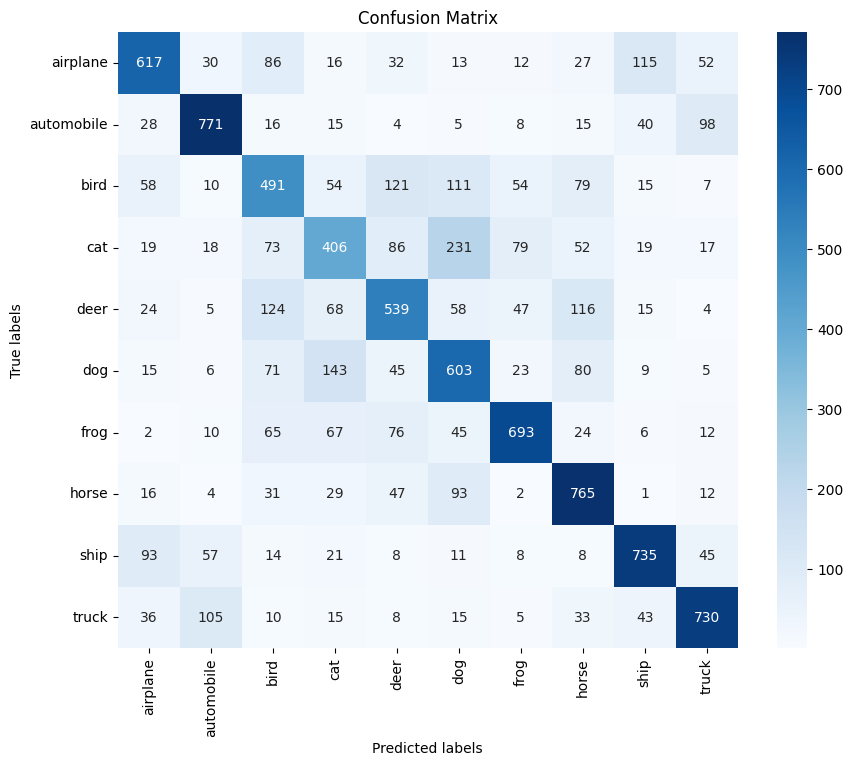

In [34]:
Y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=-1)
plot_confusion_matrix(Y_test, Y_pred_cnn, class_names)

In [35]:
def plot_sample_predictions(images, labels_true, labels_pred, class_names, rows=2, cols=5):
    plt.figure(figsize=(15, 6))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {class_names[labels_true[i][0]]}\nPred: {class_names[labels_pred[i]]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

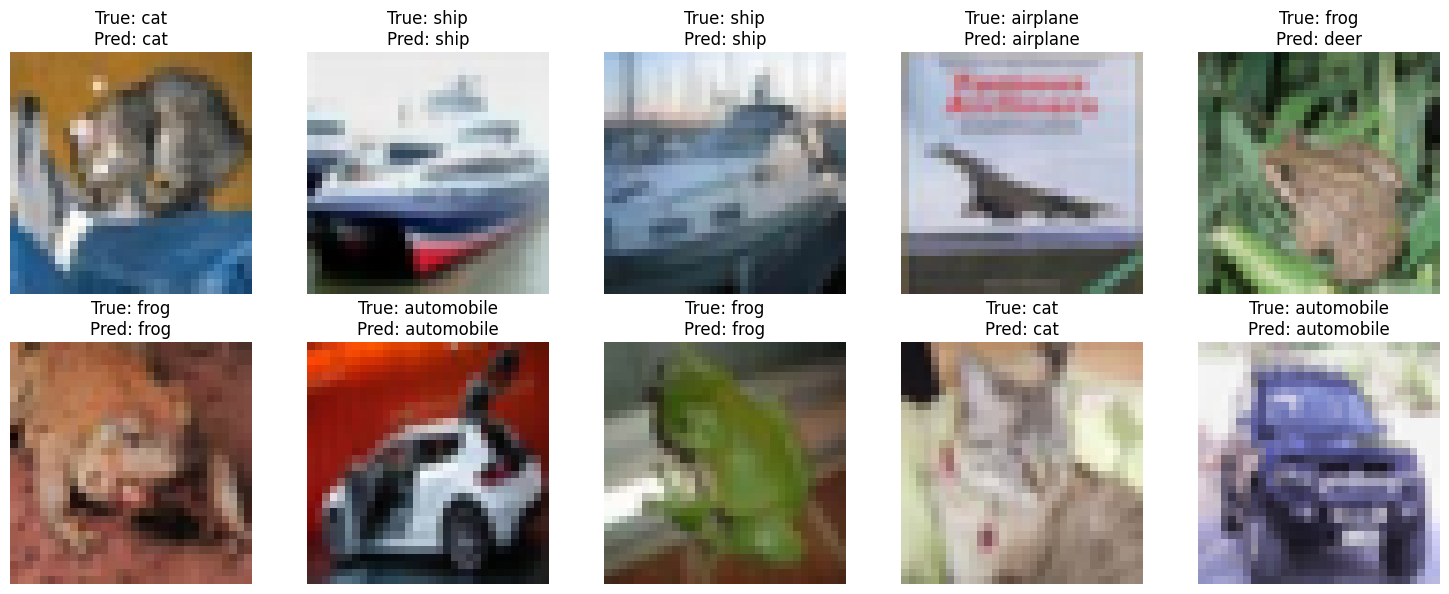

In [36]:
plot_sample_predictions(X_test, Y_test, Y_pred_cnn, class_names)
